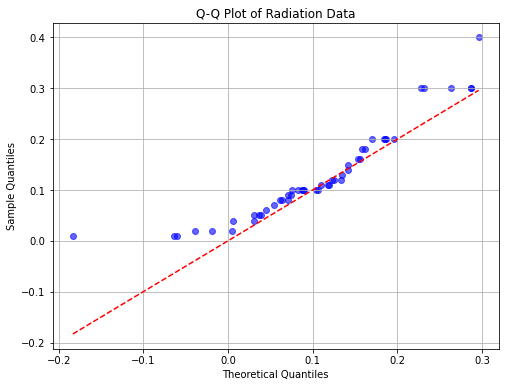

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Radiation data
radiation_data = np.array([0.14, 0.10, 0.20, 0.10, 0.05, 0.11, 0.09, 0.04, 0.09, 0.10,
                           0.08, 0.02, 0.01, 0.11, 0.10, 0.10, 0.02, 0.12, 0.01, 0.30,
                           0.10, 0.05, 0.08, 0.04, 0.16, 0.07, 0.06, 0.12, 0.01, 0.18,
                           0.10, 0.20, 0.11, 0.30, 0.02, 0.20, 0.20, 0.30, 0.30, 0.40,
                           0.30, 0.05, 0.08, 0.15, 0.12, 0.16, 0.18, 0.20, 0.13])

# Generate quantiles from a normal distribution with the same mean and standard deviation
mean = np.mean(radiation_data)
std_dev = np.std(radiation_data)
expected_quantiles = np.sort(np.random.normal(loc=mean, scale=std_dev, size=len(radiation_data)))

# Sort the observed data
observed_quantiles = np.sort(radiation_data)

# Create a Q-Q plot
plt.figure(figsize=(8, 6))
plt.scatter(expected_quantiles, observed_quantiles, color='b', alpha=0.6)
plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], color='r', linestyle='--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot of Radiation Data")
plt.grid(True)
plt.show()


In [3]:
from scipy import stats

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(radiation_data)

#null H0: The data is normally distributed
#alternate H1: The data is not normally distributed



# Interpret the p-value
alpha = 0.05
print(p_value)
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")


0.0007888170657679439
The data does not appear to be normally distributed (reject H0)


In [1]:
import numpy as np
from scipy.stats import f

# Sweat data
sweat_data = np.array([[3.7, 48.5, 9.3],
                       [5.7, 65.1, 8.0],
                       [3.8, 47.2, 10.9],
                       [3.2, 53.2, 12.0],
                       [3.1, 55.5, 9.7],
                       [4.6, 36.1, 7.9],
                       [2.4, 24.8, 14.0],
                       [7.2, 33.1, 7.6],
                       [6.7, 47.4, 8.5],
                       [5.4, 54.1, 11.3],
                       [3.9, 36.9, 12.7],
                       [4.5, 58.8, 12.3],
                       [3.5, 27.8, 9.8],
                       [4.5, 40.2, 8.4],
                       [1.5, 13.5, 10.1],
                       [8.5, 56.4, 7.1],
                       [4.5, 71.6, 8.2],
                       [6.5, 52.8, 10.9],
                       [4.1, 44.1, 11.2],
                       [5.5, 40.9, 9.4],
                       [2.5, 50.8, 10.2],
                       [5.0, 53.0, 11.0],
                       [6.8, 68.0, 13.0],
                       [7.0, 60.25, 11.5],
                       [4.5, 56.8, 9.0],
                       [6.6, 60.2, 5.0],
                       [3.0, 66.2, 7.0],
                       [8.0, 55.0, 10.0],
                       [10.0, 70.0, 12.0],
                       [6.0, 66.0, 16.0],
                       [5.5, 70.0, 12.0],
                       [7.0, 50.5, 8.0],
                       [9.0, 60.0, 11.5],
                       [5.0, 40.0, 6.0],
                       [6.0, 50.0, 10.0],
                       [4.0, 30.0, 12.0],
                       [8.0, 55.0, 16.0],
                       [9.0, 60.0, 10.0],
                       [8.0, 45.0, 13.0],
                       [3.0, 40.0, 10.0],
                       [6.0, 48.0, 11.0],
                       [8.0, 54.0, 13.0],
                       [2.0, 36.0, 6.0]])

# Hypothesized mean vector
mu0 = np.array([4, 50, 10])

# Sample mean vector
xbar = np.mean(sweat_data, axis=0)

# Sample covariance matrix
S = np.cov(sweat_data, rowvar=False)

# Sample size
n = sweat_data.shape[0]

# Number of variables
k = sweat_data.shape[1]

# Test statistic
T2 = n * (xbar - mu0).T @ np.linalg.inv(S) @ (xbar - mu0)

# Critical value at alpha = 0.10
alpha = 0.10
df1 = k
df2 = n - k
cv = df2 / df1 * f.ppf(1 - alpha, df1, df2)
print("Critical value at alpha = 0.10:", cv)

# Test result at alpha = 0.10
if T2 > cv:
    print("Reject the null hypothesis at alpha = 0.10")
else:
    print("Fail to reject the null hypothesis at alpha = 0.10")

# Critical value at alpha = 0.05
alpha = 0.05
df1 = k
df2 = n - k
cv = df2 / df1 * f.ppf(1 - alpha, df1, df2)
print("Critical value at alpha = 0.05:", cv)

# Test result at alpha = 0.05
if T2 > cv:
    print("Reject the null hypothesis at alpha = 0.05")
else:
    print("Fail to reject the null hypothesis at alpha = 0.05")

# Critical value at alpha = 0.01
alpha = 0.01
df1 = k
df2 = n - k

Critical value at alpha = 0.10: 29.681221007691708
Fail to reject the null hypothesis at alpha = 0.10
Critical value at alpha = 0.05: 37.84993864027526
Fail to reject the null hypothesis at alpha = 0.05
